# 대응(쌍체) 표본 검정
대응(쌍체)표본 검정은 같은 대상이나 관련된 두 집단에서 측정한 데이터를 비교할 때 사용되는 통계적 검정 방법입니다. 주로 “전후 변화”나 “처리 전/처리 후”와 같이 서로 관련 있는 두 조건 간의 평균 차이가 통계적으로 유의한지를 판단할 때 쓰입니다.

* 차이값의 정규성: 각 쌍의 차이가 정규분포를 따른다는 가정이 필요합니다. (표본의 크기가 충분히 크면 중심극한정리에 의해 이 가정이 완화될 수 있습니다.)
* 독립성: 각 쌍은 다른 쌍들과 독립적이어야 합니다.
* 데이터의 정확한 짝짓기: 각 쌍의 데이터가 올바르게 짝지어졌는지 확인해야 합니다. 잘못 짝지어진 데이터는 분석 결과에 영향을 줄 수 있습니다.

In [34]:
# 어떤 기업이 새로운 교육 프로그램을 도입해 직원의 성과를 개선하려고 한다.

import pandas as pd

# 귀무가설: 직원 교육 전후가 차이가 없다.
# 대립가설: 직원 교육 전후가 차이가 있다.

df = pd.DataFrame({
    'before':[85, 90, 92, 88, 86, 89, 83, 87],
    'after':[85.5,89.9,92.6,89.5,85.8,88.8,84.6,87.8]
})

In [35]:
df['diff'] = df['after'] - df['before']
df.head()

,before,after,diff
0,85,85.5,0.5
1,90,89.9,-0.1
2,92,92.6,0.6
3,88,89.5,1.5
4,86,85.8,-0.2


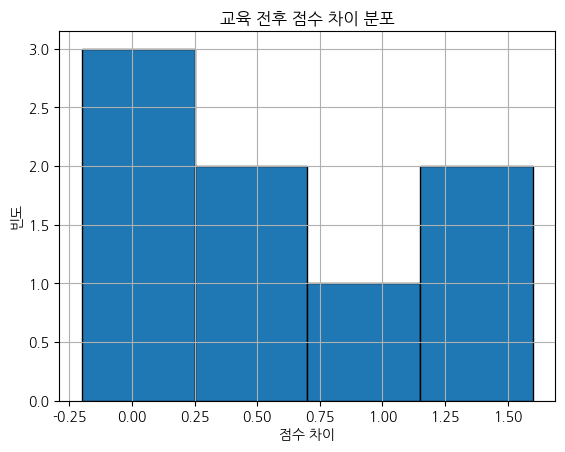

In [36]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 차이값의 분포를 시각적으로 확인 (히스토그램)
plt.hist(df["diff"], bins='auto', edgecolor='black')
plt.title("교육 전후 점수 차이 분포")
plt.xlabel("점수 차이")
plt.ylabel("빈도")
plt.grid()
plt.show()

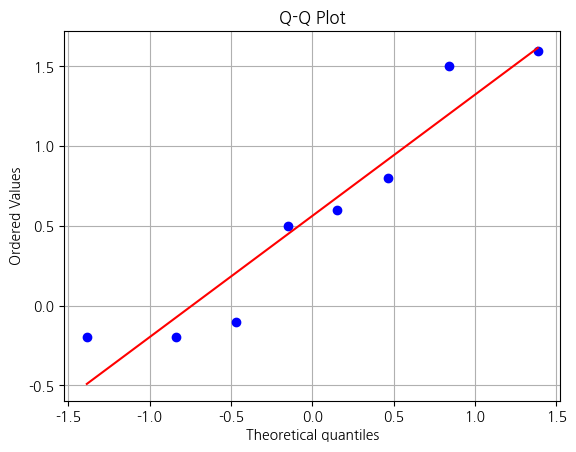

In [37]:
import scipy.stats as stats

# Q-Q 플롯 그리기
stats.probplot(df["diff"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid()
plt.show()

In [38]:
# 정규성 검정 (Shapiro-Wilk 검정 사용) // 정규성을 따른다!
stat, p_normal = stats.shapiro(df["diff"])
print("Shapiro-Wilk 검정 통계량:", stat)
print("Shapiro-Wilk p-값:", p_normal)

Shapiro-Wilk 검정 통계량: 0.885486928626845
Shapiro-Wilk p-값: 0.21232743678800203


In [39]:
# 대응 표본 검정은 양측보단 단측 검정을 사용.
# 직원 교육 전후가 차이가 있다. 즉 효가가 있다는 것으로 추론.
stats.ttest_rel(df['after'], df['before'], alternative='greater')

TtestResult(statistic=2.2127749675452324, pvalue=0.03127028733756238, df=7)

In [41]:
stats.ttest_1samp(df['diff'], 0, alternative="greater")

TtestResult(statistic=2.2127749675452324, pvalue=0.03127028733756238, df=7)

* 만약 정규성을 따르지 않았다면?

In [11]:
# Wilcoxon Signed-Rank Test (윌콕슨 부호순위검정)
stats.wilcoxon(df['after'], df['before'], alternative="greater")

WilcoxonResult(statistic=30.0, pvalue=0.0546875)

## 1. 연습문제
어떤 기업이 새로운 교육 프로그램을 도입해 직원의 성과를 개선하려고 한다. 동일한 직원 그룹에 대해 교육 전과 후의 성과를 비교했다. 새로윤 교육 프로그램은 효과가 있는지 가설검정하시오. (유의수준 0.05)

In [28]:
df = pd.DataFrame({
    'before':[85, 90, 92, 88, 86, 89, 83, 87],
    'after':[86, 92, 94, 89, 84, 90, 84, 88]
})

In [29]:
df['diff'] = df['after'] - df['before']

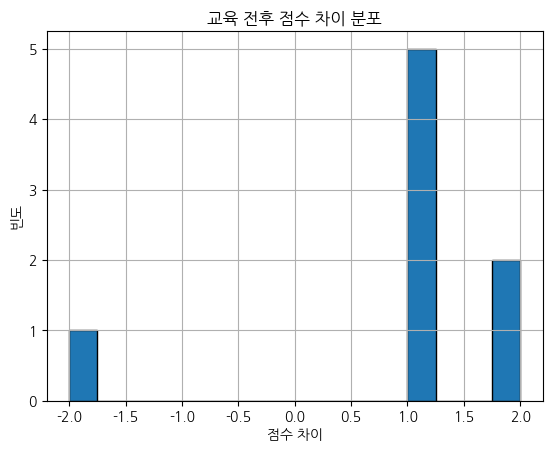

In [30]:
# 차이값의 분포를 시각적으로 확인 (히스토그램)
plt.hist(df["diff"], bins='auto', edgecolor='black')
plt.title("교육 전후 점수 차이 분포")
plt.xlabel("점수 차이")
plt.ylabel("빈도")
plt.grid()
plt.show()

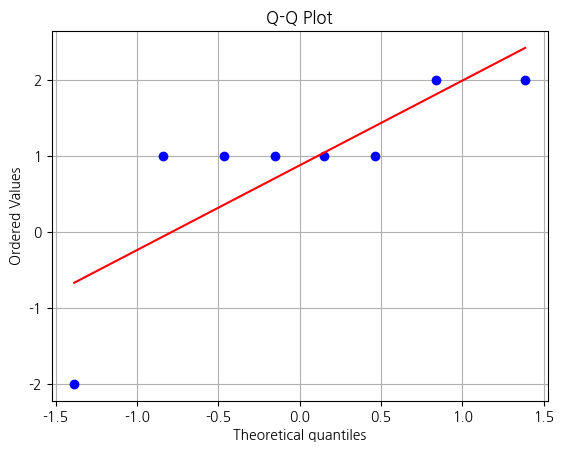

In [31]:
# Q-Q 플롯 그리기
stats.probplot(df["diff"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid()
plt.show()

In [32]:
stats.shapiro(df['diff'])

ShapiroResult(statistic=0.6886147375920879, pvalue=0.0016734051223900109)

In [33]:
# 귀무가설 채택. 직원 교육 효과가 없었다고 추론.
stats.wilcoxon(df['after'], df['before'], alternative='greater')

WilcoxonResult(statistic=29.0, pvalue=0.07421875)

## 2. 연습문제
한 학교에서 새로운 교육 프로그램의 효과를 평가하기 위해 15명의 학생을 대상으로 교육 전과 교육 후 시험 점수를 측정하였습니다. 교육 프로그램이 학생들의 성적에 긍정적인 영향을 주었는지 알아보기 위해, 두 시점(교육 전과 교육 후)의 시험 점수에 차이가 있는지를 대응(쌍체) 표본 t-검정을 이용하여 분석하고자 합니다. (유의수준 0.05)

In [21]:
before = [70, 68, 75, 80, 65, 72, 78, 74, 69, 77, 71, 73, 76, 79, 68]
after = [72, 70, 78, 82, 67, 75, 80, 77, 71, 79, 74, 76, 79, 81, 70]

In [23]:
df = pd.DataFrame({"before" : before, "after" : after})
df['diff'] = df['after'] - df['before']
df.head()

,before,after,diff
0,70,72,2
1,68,70,2
2,75,78,3
3,80,82,2
4,65,67,2


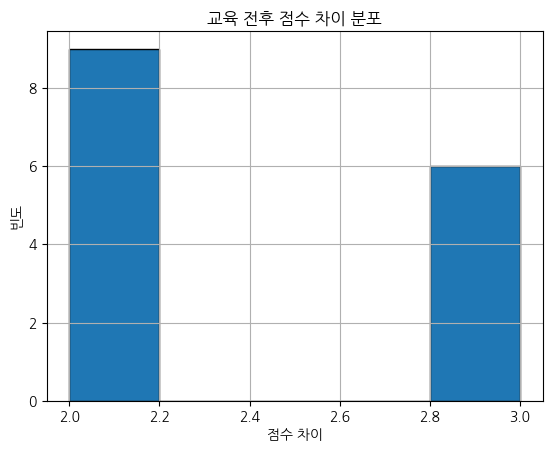

In [24]:
# 차이값의 분포를 시각적으로 확인 (히스토그램)
plt.hist(df["diff"], bins='auto', edgecolor='black')
plt.title("교육 전후 점수 차이 분포")
plt.xlabel("점수 차이")
plt.ylabel("빈도")
plt.grid()
plt.show()

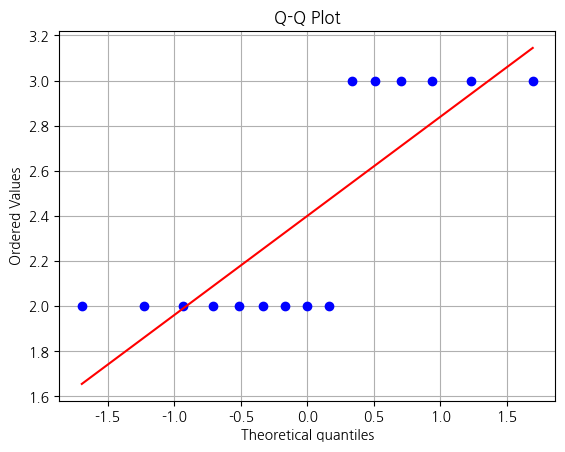

In [25]:
# Q-Q 플롯 그리기
stats.probplot(df["diff"], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid()
plt.show()

In [26]:
# 정규성을 따르지 않음.
stats.shapiro(df['diff'])

ShapiroResult(statistic=0.6303409987389212, pvalue=4.903651437444624e-05)

In [27]:
# 대립가설 채택, 효과가 있었다고 추론!
stats.wilcoxon(df['after'], df['before'], alternative='greater')

WilcoxonResult(statistic=120.0, pvalue=3.0517578125e-05)